# Chinook database analysis

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

Create a run_query() function, that takes a SQL query as an argument and returns a pandas dataframe of that query

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

Create a run_command() function that takes a SQL command as an argument and executes it using the sqlite module

In [3]:
def run_command(q):
    conn.isolation_level = None
    conn.execute(c)

Create a show_tables() function that calls the run_query() function to return a list of all tables and views in the database. Run the show_tables() function.

In [4]:
q="SELECT name, type FROM sqlite_master WHERE type IN ('"'table'"','"'view'"'); "

In [5]:
def show_tables():
    return run_query(q)

In [6]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


Write a query that returns each genre, with the number of tracks sold in absolute numbers and in percentages.

In [7]:
q4="SELECT COUNT (track.track_id), COUNT (DISTINCT(track.track_id)) tracks, COUNT (invoice_line.track_id) purchased_tracks,COUNT (DISTINCT(invoice_line.track_id)), COUNT(DISTINCT(invoice_line.invoice_id))  FROM track LEFT JOIN invoice_line ON track.track_id=invoice_line.track_id  LEFT JOIN genre ON track.genre_id=genre.genre_id   "
run_query(q4)


,COUNT (track.track_id),tracks,purchased_tracks,COUNT (DISTINCT(invoice_line.track_id)),COUNT(DISTINCT(invoice_line.invoice_id))
0,6454,3503,4757,1806,614


In [8]:
q3="SELECT genre.name, COUNT (DISTINCT(track.track_id)) all_tracks, COUNT (DISTINCT(invoice_line.track_id)) uniq_purchased_tracks, COUNT (invoice_line.track_id) purchased_tracks, COUNT(DISTINCT(invoice_line.invoice_id)) invoice,ROUND(CAST(COUNT (invoice_line.track_id) as FLOAT)/ CAST((SELECT COUNT (track_id) FROM  invoice_line) AS FLOAT)*100,2) purchase  FROM track LEFT JOIN invoice_line ON track.track_id=invoice_line.track_id  LEFT JOIN genre ON track.genre_id=genre.genre_id  GROUP BY 1 ORDER BY 6 DESC"

In [9]:
run_query(q3)

,name,all_tracks,uniq_purchased_tracks,purchased_tracks,invoice,purchase
0,Rock,1297,915,2635,519,55.39
1,Metal,374,238,619,302,13.01
2,Alternative & Punk,332,176,492,233,10.34
3,Latin,579,119,167,112,3.51
4,R&B/Soul,61,55,159,100,3.34
5,Blues,81,56,124,64,2.61
6,Jazz,130,61,121,66,2.54
7,Alternative,40,34,117,80,2.46
8,Easy Listening,24,24,74,49,1.56
9,Pop,48,25,63,42,1.32


In [10]:
frame=run_query(q3)
frame[:5]

,name,all_tracks,uniq_purchased_tracks,purchased_tracks,invoice,purchase
0,Rock,1297,915,2635,519,55.39
1,Metal,374,238,619,302,13.01
2,Alternative & Punk,332,176,492,233,10.34
3,Latin,579,119,167,112,3.51
4,R&B/Soul,61,55,159,100,3.34


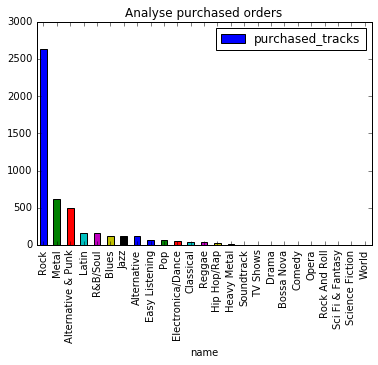

In [11]:
ax=frame.plot.bar(x="name",y="purchased_tracks")
plt.title('Analyse purchased orders')
plt.show()

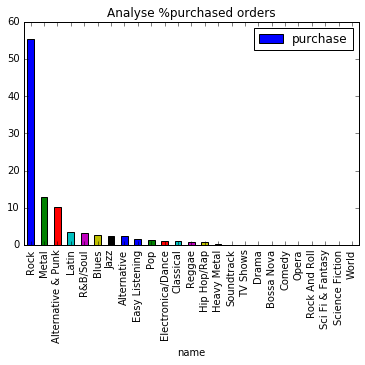

In [12]:
ax=frame.plot.bar(x="name",y="purchase")
plt.title('Analyse %purchased orders')
plt.show()

Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis. Create a plot of the results of your query. Write a short statement describing your results, and providing a possible interpretation.

In [13]:
q8="SELECT SUM(i.total), e.country, e.last_name ||' '|| e.first_name ename,COUNT(DISTINCT(i.invoice_id)),ROUND(CAST(COUNT(DISTINCT(i.invoice_id))/SUM(i.total) as FLOAT),2) FROM invoice i LEFT JOIN customer c ON c.customer_id=i.customer_id LEFT JOIN employee e ON c.support_rep_id=e.employee_id GROUP BY e.employee_id ORDER BY 1 DESC;"

In [14]:
run_query(q8)

,SUM(i.total),country,ename,COUNT(DISTINCT(i.invoice_id)),"ROUND(CAST(COUNT(DISTINCT(i.invoice_id))/SUM(i.total) as FLOAT),2)"
0,1731.51,Canada,Peacock Jane,212,0.12
1,1584.00,Canada,Park Margaret,214,0.14
2,1393.92,Canada,Johnson Steve,188,0.13


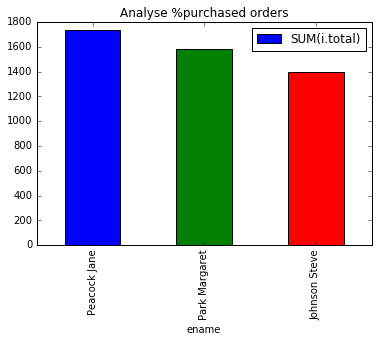

In [15]:
frame2=run_query(q8)
ax=frame2.plot.bar(x="ename",y="SUM(i.total)")
plt.title('Analyse %purchased orders')
plt.show()

Peacock Jane have the hieghts total dollar amount, but hi is only on 2nd positiotion by average ticket

Write a query that collates data on purchases from different countries. For each country, include:
total number of customers
total value of sales
average value of sales per customer
average order value
Where a country has only one customer, collect them into an "Other" group.
The results should be sorted by the total sales from highest to lowest, with the "Other" group at the very bottom.

In [16]:
q11="SELECT c.country,COUNT(i.invoice_id), COUNT(DISTINCT(c.customer_id)), SUM(i.total), SUM(i.total)/COUNT(i.invoice_id) av_price FROM customer c LEFT JOIN invoice i  ON c.customer_id=i.customer_id GROUP BY 1 ORDER BY 5 DESC;"

In [17]:
run_query(q11)

,country,COUNT(i.invoice_id),COUNT(DISTINCT(c.customer_id)),SUM(i.total),av_price
0,Czech Republic,30,2,273.24,9.108000
1,Spain,11,1,98.01,8.910000
2,Ireland,13,1,114.84,8.833846
3,United Kingdom,28,3,245.52,8.768571
4,India,21,2,183.15,8.721429
5,Belgium,7,1,60.39,8.627143
6,Germany,41,4,334.62,8.161463
7,Australia,10,1,81.18,8.118000
8,Norway,9,1,72.27,8.030000
9,USA,131,13,1040.49,7.942672


In [18]:
q12="SELECT country,count(customer_id) FROM customer GROUP BY country;"

In [19]:
run_query(q12)

,country,count(customer_id)
0,Argentina,1
1,Australia,1
2,Austria,1
3,Belgium,1
4,Brazil,5
5,Canada,8
6,Chile,1
7,Czech Republic,2
8,Denmark,1
9,Finland,1


In [20]:
q13="CREATE VIEW SORT_COUNTRY AS SELECT * FROM (SELECT country, COUNT(c.customer_id), CASE WHEN COUNT(c.customer_id)>1 THEN country ELSE 'Others<1' END AS sort FROM customer c GROUP BY 1 ORDER BY 2 DESC) ORDER BY 2 DESC;"

In [21]:
q14="SELECT sc.sort NAME1, COUNT(i.invoice_id), COUNT(DISTINCT(c.customer_id)) total_customers, SUM(i.total) total_sales, SUM(i.total)/COUNT(DISTINCT(c.customer_id)) av_price_per_customer, ROUND(SUM(i.total)/COUNT(i.invoice_id),2) average_order_value FROM customer c LEFT JOIN invoice i  ON c.customer_id=i.customer_id LEFT JOIN SORT_COUNTRY sc on sc.country=c.country   GROUP BY 1 ORDER BY 4 DESC;"

In [22]:
run_query(q14)

,NAME1,COUNT(i.invoice_id),total_customers,total_sales,av_price_per_customer,average_order_value
0,Others<1,147,15,1094.94,72.996000,7.45
1,USA,131,13,1040.49,80.037692,7.94
2,Canada,76,8,535.59,66.948750,7.05
3,Brazil,61,5,427.68,85.536000,7.01
4,France,50,5,389.07,77.814000,7.78
5,Germany,41,4,334.62,83.655000,8.16
6,Czech Republic,30,2,273.24,136.620000,9.11
7,United Kingdom,28,3,245.52,81.840000,8.77
8,Portugal,29,2,185.13,92.565000,6.38
9,India,21,2,183.15,91.575000,8.72


In [23]:
frame3=run_query(q14)

In [24]:
frame3

,NAME1,COUNT(i.invoice_id),total_customers,total_sales,av_price_per_customer,average_order_value
0,Others<1,147,15,1094.94,72.996000,7.45
1,USA,131,13,1040.49,80.037692,7.94
2,Canada,76,8,535.59,66.948750,7.05
3,Brazil,61,5,427.68,85.536000,7.01
4,France,50,5,389.07,77.814000,7.78
5,Germany,41,4,334.62,83.655000,8.16
6,Czech Republic,30,2,273.24,136.620000,9.11
7,United Kingdom,28,3,245.52,81.840000,8.77
8,Portugal,29,2,185.13,92.565000,6.38
9,India,21,2,183.15,91.575000,8.72


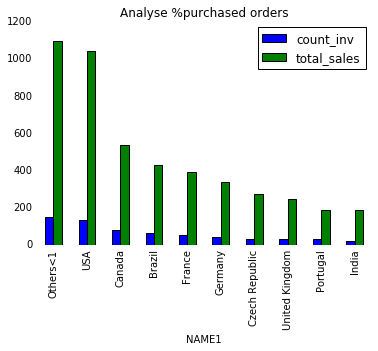

In [25]:
frame5=frame3.drop(frame3.columns[[2,4,5]],axis=1)
ax=frame5.plot.bar(x="NAME1")
a=["count_inv","total_sales"]
plt.title('Analyse %purchased orders')
for key,spine in ax.spines.items():
        spine.set_visible(False)
plt.tick_params(bottom="off",top="off",left="off",right="off")
plt.legend(a, loc=1)
plt.show()

USA is a country with the biggest total_sales. This indicator correlate with count of invoice for each country. US, Canada,Brazil, France, Germany, and UK are obviously contributing to almost 80% of total sales and are also high in their customer base - almost 64% of total customers. 
I noticed that although the total sales are higher in other countries like US/Canada, the per-person average is much higher in Czech Republic. Czech's per-order sales are the highest, too. The two customers from Czech Republic must be really hardcore fans of some artists.

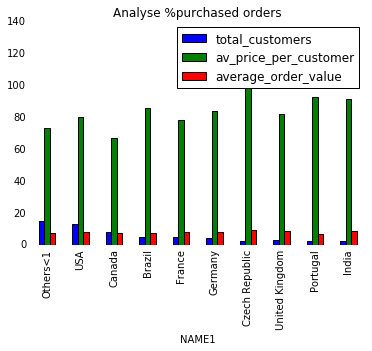

In [26]:
frame4=frame3.drop(frame3.columns[[1,3]],axis=1)
ax=frame4.plot.bar(x="NAME1")
a=["total_customers","av_price_per_customer","average_order_value"]
plt.title('Analyse %purchased orders')
for key,spine in ax.spines.items():
        spine.set_visible(False)
plt.tick_params(bottom="off",top="off",left="off",right="off")
plt.legend(a, loc=1)
plt.show()

But the hiegest average_price of invoice in India - country with the smallest total_sales, and the hieghest

In [33]:
c="CREATE VIEW al3 AS SELECT COUNT(track_id) count_track, album_id FROM track t GROUP BY album_id;"

In [34]:
c2="SELECT * FROM al3;"
run_query(c2)

,count_track,album_id
0,10,1
1,1,2
2,3,3
3,8,4
4,15,5
5,13,6
6,12,7
7,14,8
8,8,9
9,14,10


In [45]:
q18="SELECT sort, COUNT(invoice_id),SUM(count_album) FROM(SELECT invoice_id,COUNT(DISTINCT(t.album_id)) count_album , al3.count_track-COUNT(DISTINCT(t.track_id)),  CASE WHEN al3.count_track-COUNT(DISTINCT(t.track_id)) =0 THEN 'ALBUM' ELSE 'TRACK' END AS sort FROM invoice_line i LEFT JOIN track t ON t.track_id=i.track_id LEFT JOIN al3 ON al3.album_id=t.album_id  GROUP BY invoice_id) GROUP BY sort;"

In [46]:
run_query(q18)

,sort,COUNT(invoice_id),SUM(count_album)
0,ALBUM,123,194
1,TRACK,491,2883


In [47]:
q19="SELECT invoice_id,COUNT(DISTINCT(t.album_id)) count_album , al3.count_track-COUNT(t.track_id), CASE WHEN al3.count_track-COUNT(t.track_id) =0 THEN 'ALBUM' ELSE 'TRACK' END AS sort FROM invoice_line i LEFT JOIN track t ON t.track_id=i.track_id LEFT JOIN al3 ON al3.album_id=t.album_id  GROUP BY invoice_id;"